In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

towers= pd.read_csv('Europe towers.csv', index_col=0)

towers.head(5)

C:\Users\electro ain hayat\AppData\Local\Temp\ipykernel_12336\3114834444.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  towers= pd.read_csv('Europe towers.csv', index_col=0)


radio  MCC  MNC  TAC     CID  unit        LON        LAT  RANGE  SAM  \
0  UMTS  262    2  801   86355     0  13.285512  52.522202   1000    7   
1   GSM  262    2  801    1795     0  13.276907  52.525714   5716    9   
2   GSM  262    2  801    1794     0  13.285064  52.524000   6280   13   
3  UMTS  262    2  801  211250     0  13.285446  52.521744   1000    3   
4  UMTS  262    2  801   86353     0  13.293457  52.521515   1000    2   

   changeable     created     updated  averageSignal  Country   Network  \
0           1  1282569574  1300155341              0  Germany  Vodafone   
1           1  1282569574  1300155341              0  Germany  Vodafone   
2           1  1282569574  1300796207              0  Germany  Vodafone   
3           1  1282569574  1299466955              0  Germany  Vodafone   
4           1  1282569574  1291380444              0  Germany  Vodafone   

  Continent  
0    Europe  
1    Europe  
2    Europe  
3    Europe  
4    Europe

In [3]:
towers.columns

Index(['radio', 'MCC', 'MNC', 'TAC', 'CID', 'unit', 'LON', 'LAT', 'RANGE',
       'SAM', 'changeable', 'created', 'updated', 'averageSignal', 'Country',
       'Network', 'Continent'],
      dtype='object')

In [4]:
towers.head()

radio  MCC  MNC  TAC     CID  unit        LON        LAT  RANGE  SAM  \
0  UMTS  262    2  801   86355     0  13.285512  52.522202   1000    7   
1   GSM  262    2  801    1795     0  13.276907  52.525714   5716    9   
2   GSM  262    2  801    1794     0  13.285064  52.524000   6280   13   
3  UMTS  262    2  801  211250     0  13.285446  52.521744   1000    3   
4  UMTS  262    2  801   86353     0  13.293457  52.521515   1000    2   

   changeable     created     updated  averageSignal  Country   Network  \
0           1  1282569574  1300155341              0  Germany  Vodafone   
1           1  1282569574  1300155341              0  Germany  Vodafone   
2           1  1282569574  1300796207              0  Germany  Vodafone   
3           1  1282569574  1299466955              0  Germany  Vodafone   
4           1  1282569574  1291380444              0  Germany  Vodafone   

  Continent  
0    Europe  
1    Europe  
2    Europe  
3    Europe  
4    Europe

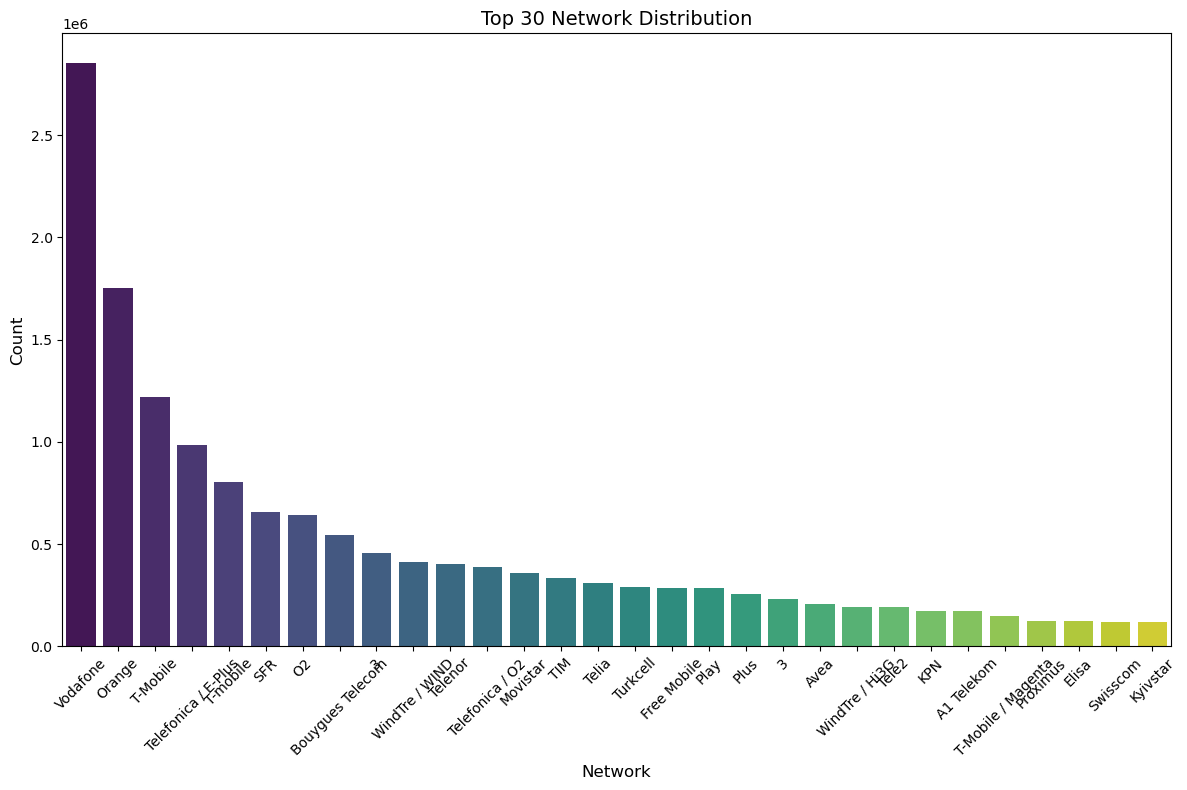

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


data = towers['Network'].value_counts().reset_index()
data.columns = ['Network', 'count']
data = data.head(30)  # Get top 30 networks since more than that just too small to visualize


plt.figure(figsize=[12,8])


sns.barplot(x='Network', y='count', data=data, palette='viridis')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, size=10)


plt.title('Top 30 Network Distribution', fontsize=14)
plt.xlabel('Network', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


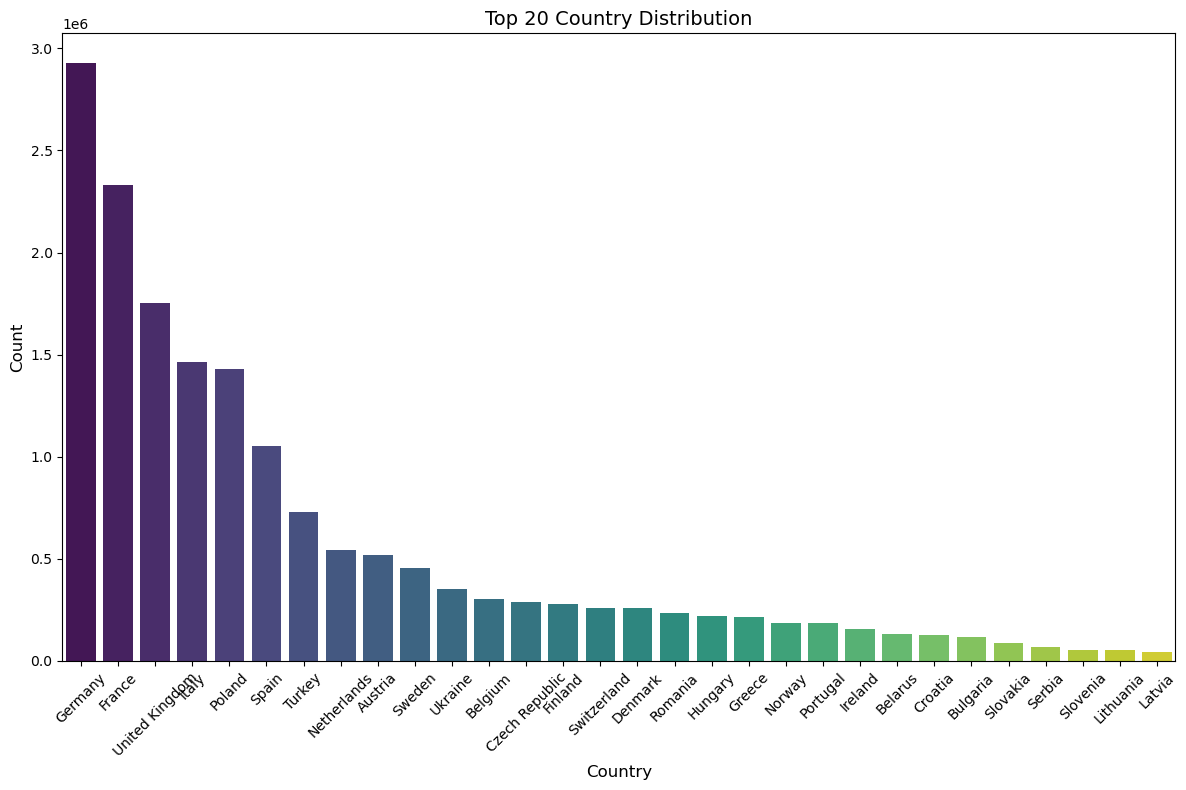

In [4]:
data = towers['Country'].value_counts().reset_index()
data.columns = ['Country', 'count']
data = data.head(30)  # Get top 30 countries since more than that are too small to visualize


plt.figure(figsize=[12,8])

sns.barplot(x='Country', y='count', data=data, palette='viridis')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, size=10)


plt.title('Top 20 Country Distribution', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

In [5]:
import folium
from folium.plugins import MarkerCluster

sa = towers[towers['Country'] == 'Armenia'] #Using Armenia since it got less cell towers to keep the Notebook less than 25MB Github limit
map_center = [sa['LAT'].mean(), sa['LON'].mean()]
mymap = folium.Map(location=map_center, zoom_start=5)

marker_cluster = MarkerCluster().add_to(mymap)
for idx, row in sa.iterrows():
    folium.Marker(location=[row['LAT'], row['LON']]).add_to(marker_cluster)


mymap